In [6]:
import bokeh
import pandas as pd
import numpy as np
from os.path import dirname, join
from bokeh.io import output_file, show, curdoc
from bokeh.layouts import gridplot
from bokeh.palettes import Viridis3
from bokeh.plotting import figure
from bokeh.models import CustomJS, Slider, ColumnDataSource, WidgetBox, Div, BoxSelectTool, BoxZoomTool, LassoSelectTool, Spacer
from bokeh.layouts import layout, widgetbox, row, column
from bokeh.models.widgets import Button, RadioButtonGroup, Select, Slider, RangeSlider, TextInput, Tabs, Panel
#from bokeh.plotting import Histogram - no longer exists.
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('./data/pdb_test_plot_data.csv')
del data['Unnamed: 0']

data = data[data['phValue']!=100]
data['pH - pI'] = data['phValue'] - data['pI']

data.loc[data['pI']>7,'Protein Acidity'] = 'Basic'
data.loc[data['pI']<=7,'Protein Acidity'] = 'Acidic'

data.loc[data['crystallizationTempK']<150, 'crystallizationTempK'] =+ 273
data.loc[data['crystallizationTempK']==294100, 'crystallizationTempK'] = 294.1

Numpy's `.where(condition, [x, y])` method returns elements chosen from `x` or `y` depending on where `condition` is True or False. (Works like an if statement).

In [17]:
data['color'] = np.where(data['Protein Acidity'] == 'Basic', 'blue', 'orange')

ValueError: 'c' argument has 15974 elements, which is not acceptable for use with 'x' with size 38299, 'y' with size 38299.

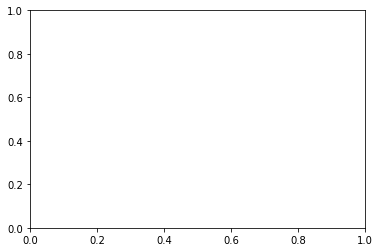

In [24]:
fig, ax = plt.subplots()
ax.scatter(data[data['pI'] < 7]['pI'], data[data['pI'] < 7]['pH - pI'], alpha = 0.3, c = data[data['pI'] > 7]['color'], edgecolors = 'none', s = 5, label = 'Acidic')
ax.scatter(data[data['pI'] >= 7]['pI'], data[data['pI'] > 7]['pH - pI'], alpha = 0.3, c = data[data['pI'] < 7]['color'], edgecolors = 'none', s = 5, label = 'Basic')


fig.set_size_inches(10,7)
ax.grid(True)

plt.xlabel('pI')
plt.ylabel('pH - pI')
plt.title('Scatterplot of pH - pI vs pI of Proteins Crystallized in PDB')
plt.legend()
plt.show()

In [25]:
data.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear', 'sequence',
       'Protein Analysis', 'Aromaticity', 'Instability Index', 'pI', 'Gravy',
       'Helix %', 'Turn %', 'Sheet %', 'pH - pI', 'Protein Acidity', 'color'],
      dtype='object')

In [30]:
year_df = data.groupby(['publicationYear']).count()['structureId'].reset_index()
year_df = year_df[year_df['publicationYear']!=2017]
year_df

,publicationYear,structureId
0,1986.0,1
1,1987.0,1
2,1988.0,1
3,1989.0,2
4,1990.0,3
5,1991.0,1
6,1992.0,5
7,1993.0,3
8,1994.0,7
9,1995.0,19


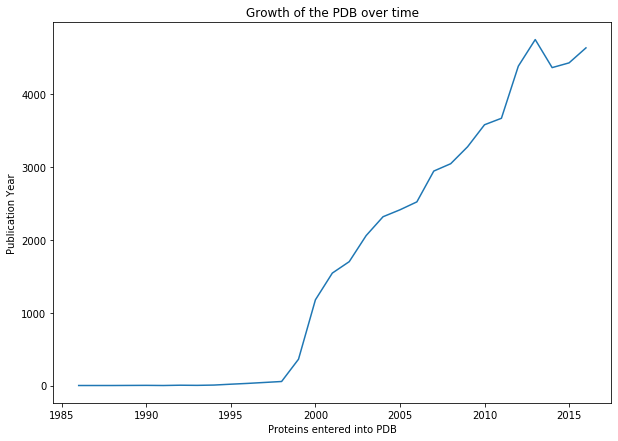

In [29]:
plt.figure(figsize=(10,7))
plt.plot(year_df['publicationYear'], year_df['structureId'])


plt.xlabel('Proteins entered into PDB')
plt.ylabel('Publication Year')
plt.title('Growth of the PDB over time')
plt.show()

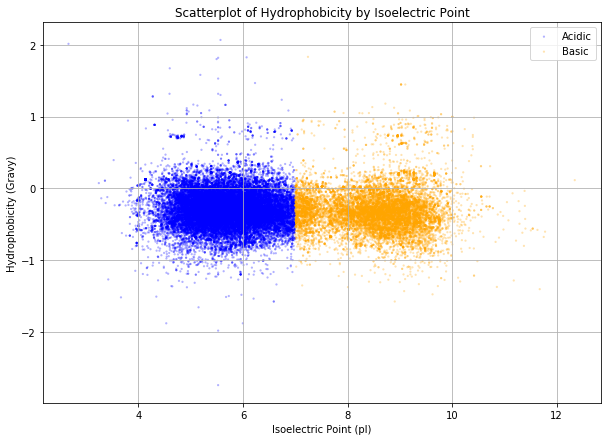

In [8]:
fig, ax = plt.subplots()
ax.scatter(data[data['pI'] < 7]['pI'], data[data['pI'] < 7]['Gravy'], alpha = 0.3, c = data[data['pI'] > 7]['color'], edgecolors = 'none', s = 5, label = 'Acidic')
ax.scatter(data[data['pI'] >= 7]['pI'], data[data['pI'] > 7]['Gravy'], alpha = 0.3, c = data[data['pI'] < 7]['color'], edgecolors = 'none', s = 5, label = 'Basic')



fig.set_size_inches(10,7)
ax.grid(True)

plt.xlabel('Isoelectric Point (pI)')
plt.ylabel('Hydrophobicity (Gravy)')
plt.title('Scatterplot of Hydrophobicity by Isoelectric Point')
plt.legend()
plt.show()

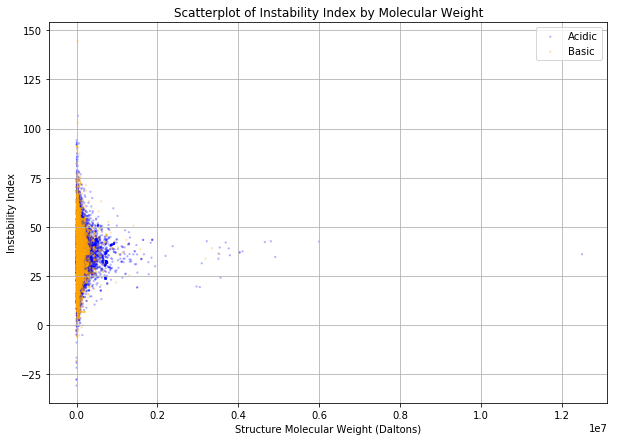

In [9]:
fig, ax = plt.subplots()
ax.scatter(data[data['pI'] < 7]['structureMolecularWeight'], data[data['pI'] < 7]['Instability Index'], alpha = 0.3, c = data[data['pI'] > 7]['color'], edgecolors = 'none', s = 5, label = 'Acidic')
ax.scatter(data[data['pI'] >= 7]['structureMolecularWeight'], data[data['pI'] >= 7]['Instability Index'], alpha = 0.3, c = data[data['pI'] < 7]['color'], edgecolors = 'none', s = 5, label = 'Basic')



fig.set_size_inches(10,7)
ax.grid(True)

plt.xlabel('Structure Molecular Weight (Daltons)')
plt.ylabel('Instability Index')
plt.title('Scatterplot of Instability Index by Molecular Weight')
plt.legend()
plt.show()